In [253]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statistics import mean



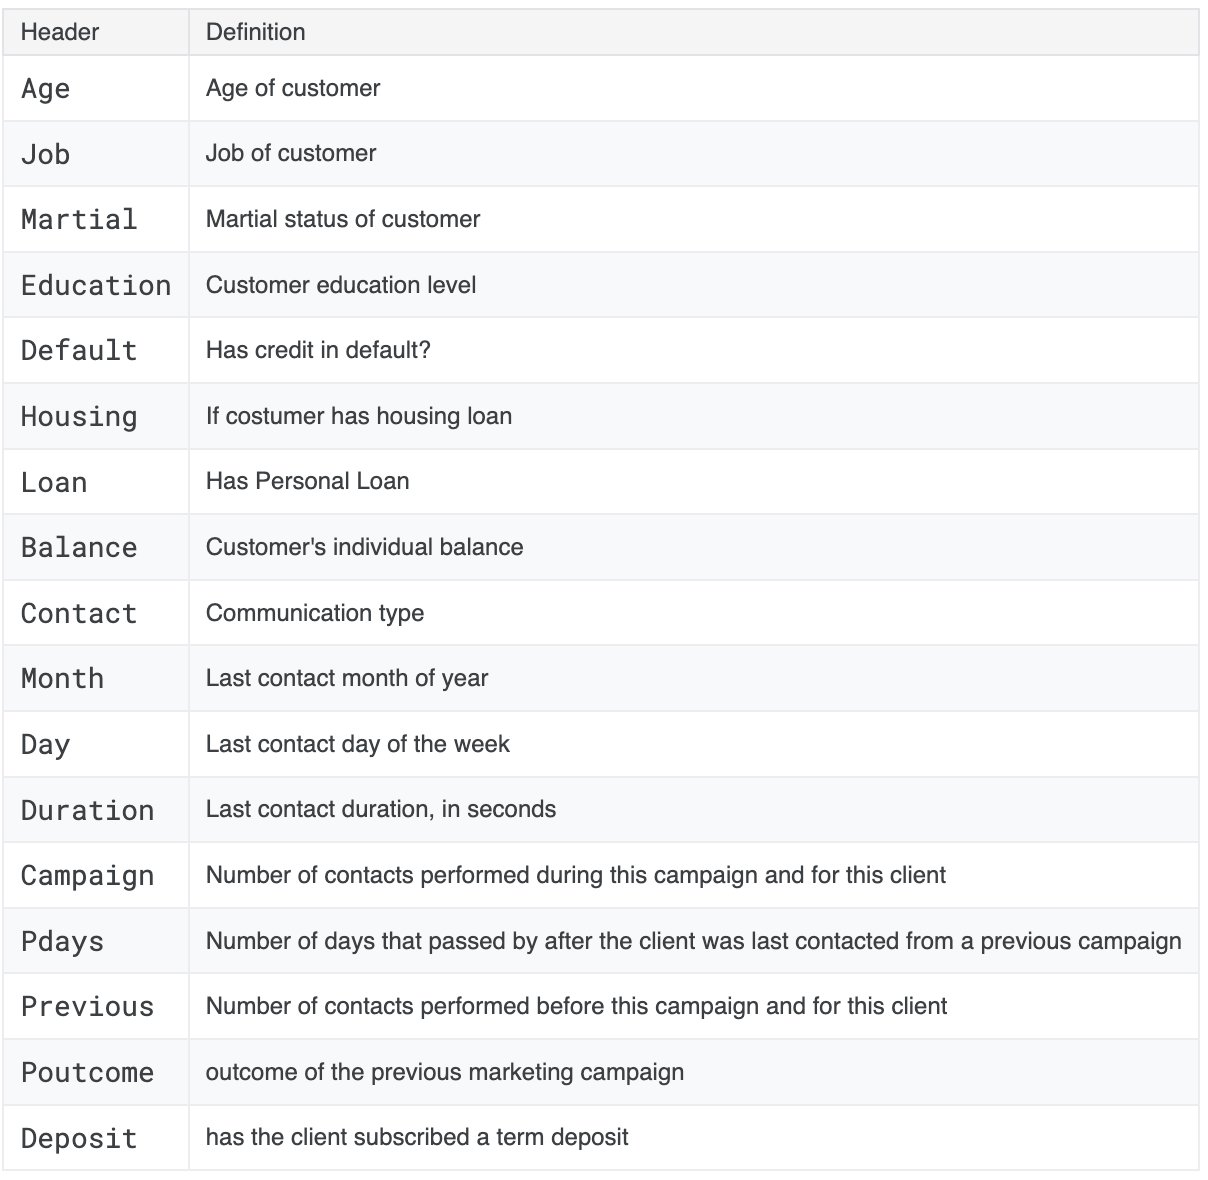

In [2]:
# Info about the features
from IPython.display import display, Image
display(Image(filename="/Users/camilosalamanca/Desktop/foto123.png", width=500))

In [3]:
# Read the data
df = pd.read_csv('bank.csv')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
df.shape

(11162, 17)

Observation: We have 11162 rows and 17 columns for this dataset

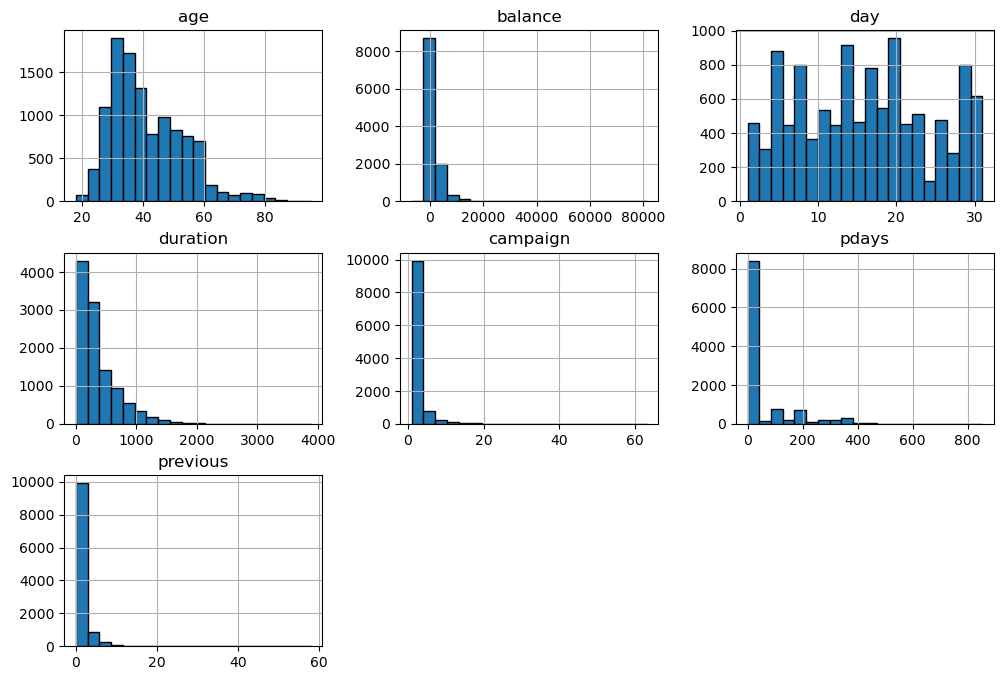

In [6]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.show()

In [7]:
# checking missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Observation: We don't have missing values

#### Encoding

In [10]:
# Identify object columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
#Performing label encoding
columns_to_encode = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

le = LabelEncoder()

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [12]:
#Performing ordinary encoding on education column
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [13]:
#Perform ordinary encoding on education column
encoder = OrdinalEncoder(categories=[['tertiary','secondary','primary', 'unknown']])

df['education'] = encoder.fit_transform(df[['education']])

# As the encoding its a float, I'll change it to int 
df['education'] = df['education'].astype(int)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,0,0,184,0,0,2,5,8,673,2,-1,0,3,1


Observation: Since we have some features as categorical type we apply label encoding for: 

### Logistic regresssion

In [29]:
# Defining our target feature
X = df.drop('deposit', axis=1)
Y = df['deposit']

In [31]:
#splitting the data (67% Train data & 33% test data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [64]:
lr = LogisticRegression(random_state=16, max_iter=10000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=16)

In [74]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [79]:
diff_df = pd.DataFrame({'Actual' : Y_test, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


### Desicion Tree

In [88]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(X_train, Y_train)

DecisionTreeClassifier()

In [91]:
Y_dt_pred = dt_clr.predict(X_test)
Y_dt_pred

array([0, 1, 1, ..., 0, 1, 1])

In [94]:
dt_clr_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_dt_pred})
dt_clr_df

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,1


### SVM

In [100]:
svc = SVC() #Model building
svc.fit(X_train, Y_train) #Model Training

SVC()

In [103]:
#Model Prediction
Y_svc_pred = svc.predict(X_test)

In [106]:
results_diff = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_svc_pred})
results_diff

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


In [129]:
# kernel= rbf and c=3
svc_opt = SVC(kernel='rbf', C=3, probability=True)
svc_opt.fit(X_train, Y_train)
Y_pred = svc_opt.predict(X_test)

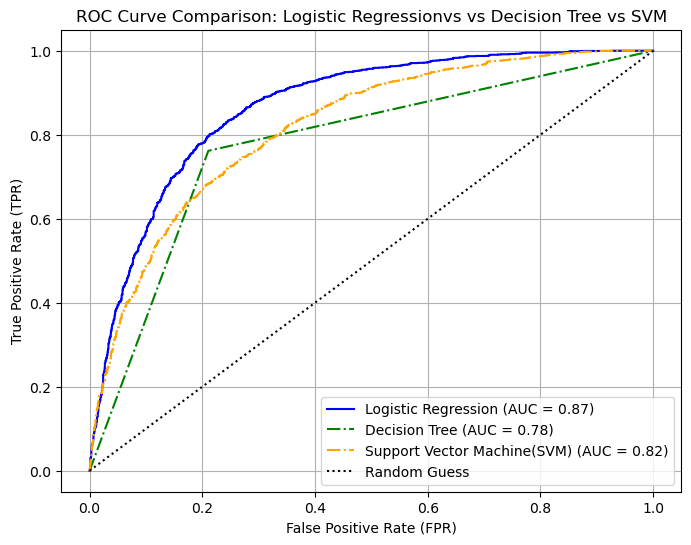

In [137]:
Y_lr_probs = lr.predict_proba(X_test)[:, 1]
Y_dt_probs = dt_clr.predict_proba(X_test)[:, 1]
Y_svm_probs = svc_opt.predict_proba(X_test)[:, 1]


# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)


# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regressionvs vs Decision Tree vs SVM")
plt.legend()
plt.grid(True)
plt.show()

This are the results following the research paper process:

- The blue curve representing Logistic Regression has the highest AUC (0.87)
- The orange dashed line for SVM has an AUC of 0.82
- The green dashed-dotted line for the Decision Tree has an AUC of 0.78, making it the least effective classifier among the three.


### Contribution part 

### Logistic regresssion 2.0

In [145]:
X_2 = X.copy()
Y_2 = Y.copy()

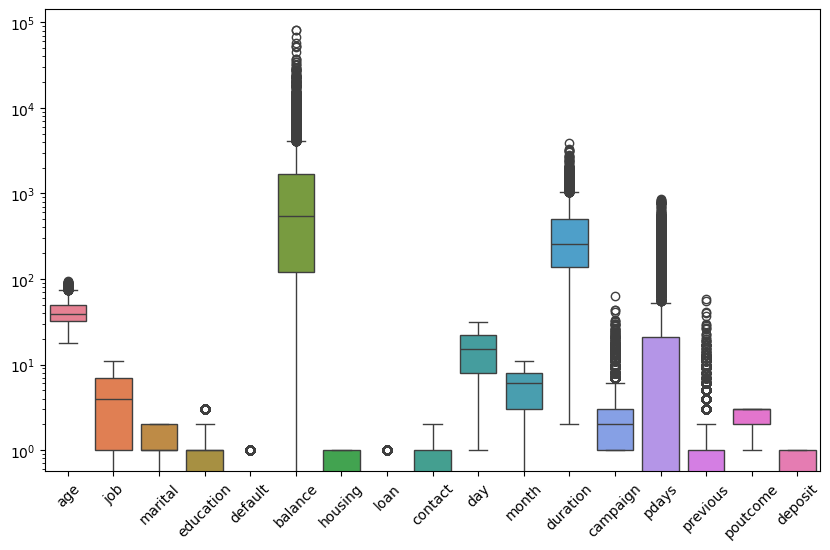

In [168]:
#Boxplot just to check the outliers 
plt.figure(figsize=(10, 6))
sb.boxplot(data=df)


plt.yscale("log")

plt.xticks(rotation=45) 
plt.show()

In [181]:
# spliting the data 
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.33, random_state=42)

In [183]:
#since we have some outliers it's better to perform robustsacaler
scaler = RobustScaler()

# Training data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [187]:
lr = LogisticRegression(random_state=16, max_iter=10000)
lr.fit(X_2_train, Y_2_train)

LogisticRegression(max_iter=10000, random_state=16)

In [190]:
Y_2_pred = lr.predict(X_test_scaled)
Y_2_pred

array([0, 0, 0, ..., 0, 0, 0])

In [193]:
diff_df = pd.DataFrame({'Actual' : Y_test, 'Predicted': Y_pred})
diff_df

,Actual,Predicted
5527,0,0
4541,1,1
1964,1,1
5007,1,1
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


In [196]:
#confussion matrix
conf_matrix_lr = confusion_matrix(Y_2_test, Y_2_pred)
conf_matrix_lr

array([[1915,    2],
       [1758,    9]])

### Observations:
#### True Negatives (TN) = 1915
The model correctly predicted 1915 people as "No Diabetes."
#### False Positives (FP) = 2
The model incorrectly predicted 2 people as having diabetes when they actually didn't (Type I error).
#### False Negatives (FN) = 1352
The model incorrectly predicted 1352 people as "No Diabetes" when they actually had diabetes (Type II error).
#### True Positives (TP) = 9
The model correctly predicted 9 people as having diabetes.

In [209]:
target_names = ['deposit', 'no deposit']
print(classification_report(Y_2_test, Y_2_pred, target_names=target_names))

              precision    recall  f1-score   support

     deposit       0.52      1.00      0.69      1917
  no deposit       0.82      0.01      0.01      1767

    accuracy                           0.52      3684
   macro avg       0.67      0.50      0.35      3684
weighted avg       0.66      0.52      0.36      3684



In [294]:
print(f'Accuracy score for linear regression classifier: {accuracy_score(Y_2_test, Y_2_pred):2f}')

Accuracy score for linear regression classifier: 0.522258


### Decision Tree 2.0

In [221]:
dt_clr_2 = DecisionTreeClassifier()
dt_clr_2.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [224]:
Y_dt_pred_2 = dt_clr.predict(X_test_scaled)
Y_dt_pred_2

array([0, 0, 1, ..., 0, 0, 0])

In [227]:
dt_clr_df_2 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_dt_pred_2})
dt_clr_df_2

,Actual,Predicted
5527,0,0
4541,1,0
1964,1,1
5007,1,0
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


In [235]:
dt_accuracy = accuracy_score(Y_2_test, Y_dt_pred_2)
print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:2f}")

Accuracy for Decision Tree Classifier: 0.606949


#### Optimazing Decision Tree


In [248]:
#Find the best value for max_depth in decision tree
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(DecisionTreeClassifier(criterion= 'entropy', max_depth=d), X_train_scaled, Y_2_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

In [255]:
best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 9


In [258]:
dt_clr_opt = DecisionTreeClassifier(criterion='entropy', max_depth=9)
dt_clr_opt.fit(X_train_scaled, Y_2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [261]:
Y_dt_opt_pred = dt_clr_opt.predict(X_test_scaled)

In [267]:
target_names = ['deposit', 'no deposit']
print(classification_report(Y_2_test, Y_dt_opt_pred, target_names=target_names))

              precision    recall  f1-score   support

     deposit       0.82      0.80      0.81      1917
  no deposit       0.79      0.81      0.80      1767

    accuracy                           0.81      3684
   macro avg       0.81      0.81      0.81      3684
weighted avg       0.81      0.81      0.81      3684



In [264]:
print(f"Accuracy score for the optimized decision tree classifier: {accuracy_score(Y_2_test, Y_dt_opt_pred)}")

Accuracy score for the optimized decision tree classifier: 0.8061889250814332


### SVM 2.0

In [274]:
svc_2 = SVC() #Model building
svc_2.fit(X_train_scaled, Y_2_train) #Model Training

SVC()

In [277]:
#Model Prediction
Y_svc_2_pred = svc.predict(X_test_scaled) 

In [280]:
results_diff_2 = pd.DataFrame({'Actual': Y_2_test, 'Predicted': Y_svc_2_pred})
results_diff_2

,Actual,Predicted
5527,0,0
4541,1,0
1964,1,0
5007,1,0
8928,0,0
...,...,...
5799,0,0
5950,0,0
10479,0,0
1728,1,0


In [296]:
# kernel= rbf and c=3
svc_opt_2 = SVC(kernel='linear', C=3, probability=True)
svc_opt_2.fit(X_train_scaled, Y_train)
Y_2_pred = svc_opt_2.predict(X_test_scaled)

In [303]:
target_names = ['deposit > 50', 'no deposit']
print(classification_report(Y_2_test, Y_2_pred, target_names=target_names))

              precision    recall  f1-score   support

deposit > 50       0.79      0.81      0.80      1917
  no deposit       0.79      0.76      0.77      1767

    accuracy                           0.79      3684
   macro avg       0.79      0.79      0.79      3684
weighted avg       0.79      0.79      0.79      3684



In [307]:
print(f'Accuracy score for SVM classifier: {accuracy_score(Y_2_test, Y_2_pred):2f}')

Accuracy score for SVM classifier: 0.787459


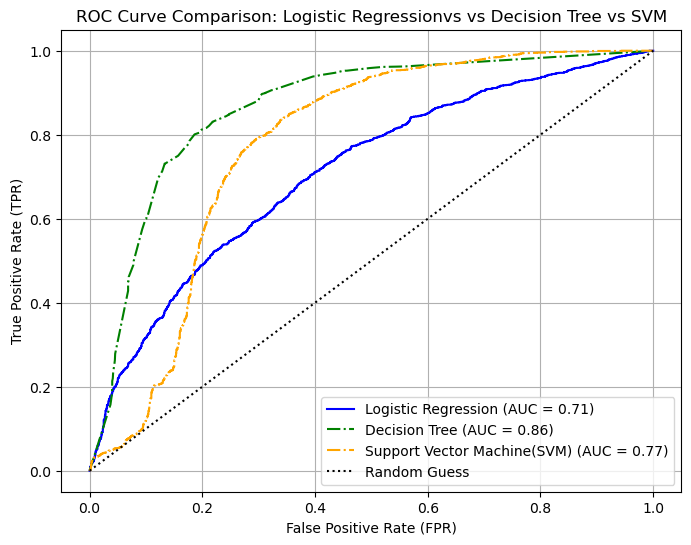

In [315]:
Y_lr_probs = lr.predict_proba(X_test_scaled)[:, 1]
Y_dt_probs = dt_clr_opt.predict_proba(X_test_scaled)[:, 1]
Y_svm_probs = svc_opt.predict_proba(X_test_scaled)[:, 1]


# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)


# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Logistic Regressionvs vs Decision Tree vs SVM")
plt.legend()
plt.grid(True)
plt.show()